In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset
df = pd.read_csv("ai_financial_market.csv")
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8
0,01-01-2015,OpenAI,5.92,0.63,-36.82,NaN,-0.36,NaN,NaN
1,02-01-2015,OpenAI,5.41,1.81,80.59,NaN,0.41,NaN,NaN
2,03-01-2015,OpenAI,4.50,0.61,-38.88,NaN,0.23,NaN,NaN
3,04-01-2015,OpenAI,5.45,0.95,-5.34,NaN,0.93,NaN,NaN
4,05-01-2015,OpenAI,3.40,1.48,48.45,NaN,-0.09,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
 7   Unnamed: 7           0 non-null      float64
 8   Unnamed: 8           3 non-null      float64
dtypes: float64(6), object(3)
memory usage: 770.7+ KB


In [4]:
df['Date']= pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
 7   Unnamed: 7           0 non-null      float64       
 8   Unnamed: 8           3 non-null      float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 770.7+ KB


In [5]:
#show the companies name in the dataset
df['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [6]:
#create a new column for year
df['Year'] = df['Date'].dt.year

In [7]:
df.isnull().sum()

Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
Unnamed: 7             10959
Unnamed: 8             10956
Year                       0
dtype: int64

In [8]:
#how much amount the companies spent on R & D ?
RD = df.groupby('Company') ['R&D_Spending_USD_Mn'].sum().sort_values(ascending=False)
print(RD)

Company
Google    423341.14
Meta      264533.07
OpenAI     26482.77
Name: R&D_Spending_USD_Mn, dtype: float64


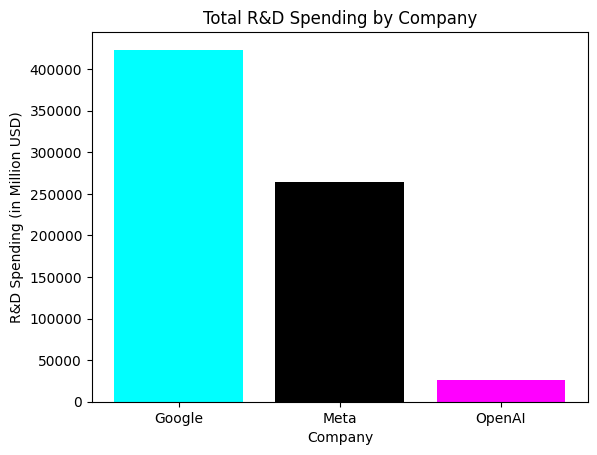

In [9]:
# plt.figure(figsize=(10,6))
# sns.barplot(x=df['Company'], y=df['R&D_Spending_USD_Mn'], ci=None)
# plt.bar(df['Company'], df['R&D_Spending_USD_Mn'])
plt.bar(RD.index, RD.values, color=['cyan', 'black' , 'magenta'])
plt.title('Total R&D Spending by Company')
plt.xlabel('Company')
plt.ylabel('R&D Spending (in Million USD)')
plt.show()

In [10]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,NaN,NaN,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,NaN,NaN,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,NaN,NaN,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,NaN,NaN,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,NaN,NaN,2015


In [11]:
rev = df.groupby('Company')['AI_Revenue_USD_Mn'].sum().sort_values(ascending=False)

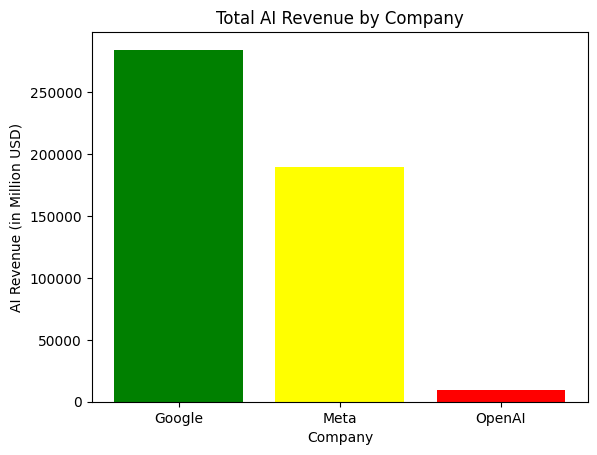

In [12]:
plt.bar(rev.index, rev.values, color=['green','yellow','red'])
plt.title('Total AI Revenue by Company')
plt.xlabel('Company')
plt.ylabel('AI Revenue (in Million USD)')
plt.show()

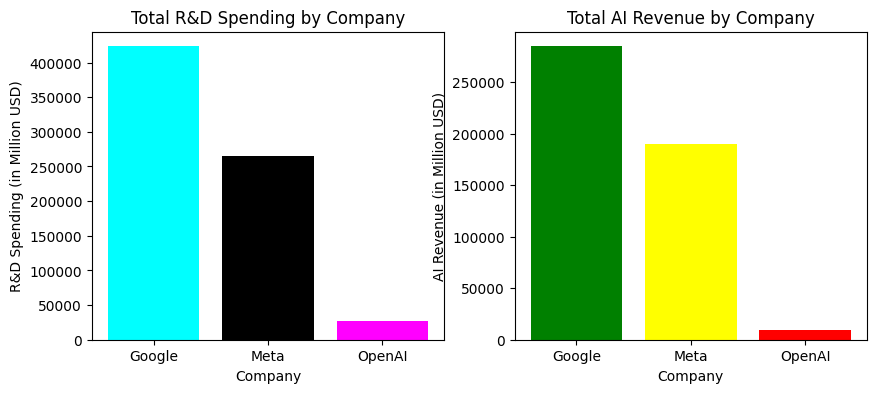

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(RD.index, RD.values, color=['cyan', 'black' , 'magenta'])
plt.title('Total R&D Spending by Company')
plt.xlabel('Company')
plt.ylabel('R&D Spending (in Million USD)')

plt.subplot(1,2,2)
plt.bar(rev.index, rev.values, color=['green','yellow','red'])
plt.title('Total AI Revenue by Company')
plt.xlabel('Company')
plt.ylabel('AI Revenue (in Million USD)')
plt.show()
#

In [14]:
# How much google spent the highest amount on R & D in 2022 ?
google_2022 = df[(df['Company']=='Google')& (df['Year']==2022)] ['R&D_Spending_USD_Mn'].sum()
print(google_2022)



50009.880000000005


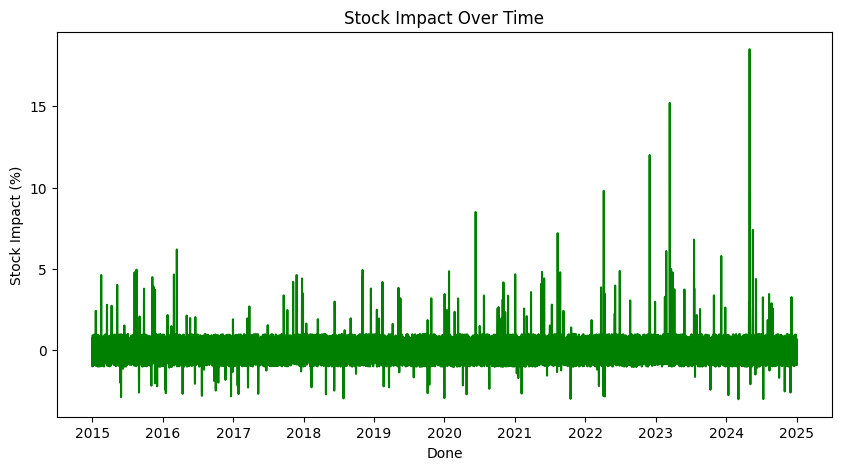

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['Stock_Impact_%'] , color='green' )
plt.title('Stock Impact Over Time')
plt.xlabel('Done')
plt.ylabel('Stock Impact (%)')
plt.show()

In [16]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,NaN,NaN,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,NaN,NaN,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,NaN,NaN,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,NaN,NaN,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,NaN,NaN,2015


In [17]:
#Seperate dataframes for each company

df_openAi = df[df['Company']=='OpenAI']
df_openAi
df_google = df[df['Company']=='Google']
df_meta = df[df['Company']=='Meta']


In [18]:
df_openAi.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,NaN,NaN,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,NaN,NaN,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,NaN,NaN,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,NaN,NaN,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,NaN,NaN,2015


In [19]:
df_google.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
3653,2015-01-01,Google,79.89,30.19,0.64,NaN,-0.02,NaN,NaN,2015
3654,2015-01-02,Google,78.99,30.44,1.47,NaN,-0.98,NaN,NaN,2015
3655,2015-01-03,Google,79.20,30.46,1.53,NaN,0.78,NaN,NaN,2015
3656,2015-01-04,Google,79.59,30.55,1.82,NaN,-0.41,NaN,NaN,2015
3657,2015-01-05,Google,81.50,30.59,1.97,NaN,-0.78,NaN,NaN,2015


In [20]:
df_meta.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
7306,2015-01-01,Meta,50.39,18.95,-5.23,NaN,-0.42,NaN,NaN,2015
7307,2015-01-02,Meta,49.80,19.77,-1.16,NaN,0.63,NaN,NaN,2015
7308,2015-01-03,Meta,49.09,19.96,-0.21,NaN,0.73,NaN,NaN,2015
7309,2015-01-04,Meta,50.66,20.48,2.38,NaN,-0.26,NaN,NaN,2015
7310,2015-01-05,Meta,51.36,19.84,-0.80,NaN,-0.37,NaN,NaN,2015


<Axes: title={'center': 'OpenAi Stock Impact Over Time'}, xlabel='Date'>

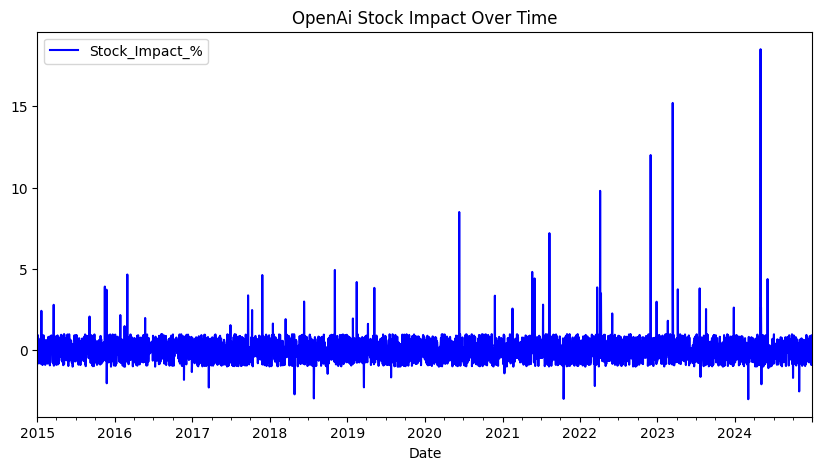

In [21]:
df_openAi.plot( x='Date', y='Stock_Impact_%', title= 'OpenAi Stock Impact Over Time', color='blue', figsize=(10,5))

<Axes: title={'center': 'Google Stock Impact Over Time'}, xlabel='Date'>

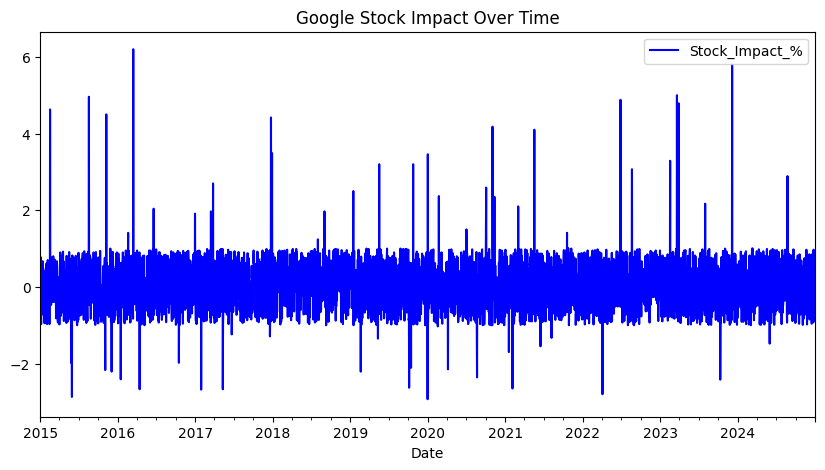

In [22]:
df_google.plot( x='Date', y='Stock_Impact_%', title= 'Google Stock Impact Over Time', color='blue', figsize=(10,5))

<Axes: title={'center': 'Meta Stock Impact Over Time'}, xlabel='Date'>

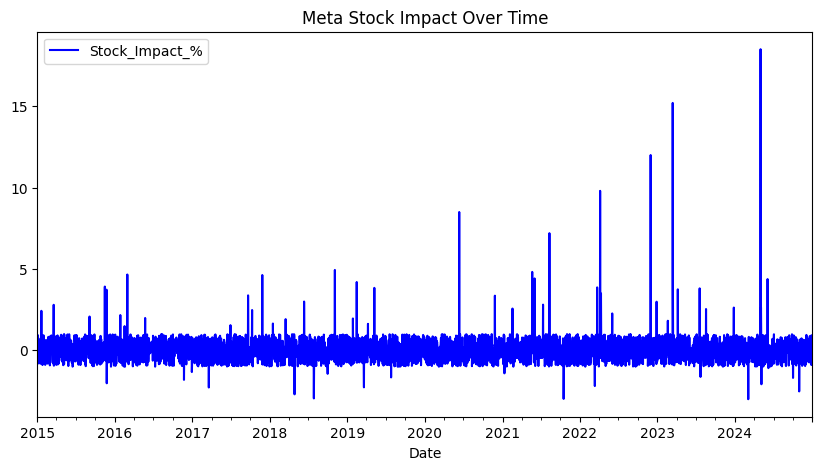

In [23]:
df_openAi.plot( x='Date', y='Stock_Impact_%', title= 'Meta Stock Impact Over Time', color='blue', figsize=(10,5))

OpenAI Events when Maximum Stock Impact was Observed

In [24]:
df_openAi

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,NaN,NaN,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,NaN,NaN,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,NaN,NaN,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,NaN,NaN,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...
3648,2024-12-27,OpenAI,10.06,4.71,370.69,NaN,0.93,NaN,NaN,2024
3649,2024-12-28,OpenAI,9.67,5.32,432.15,NaN,-0.25,NaN,NaN,2024
3650,2024-12-29,OpenAI,9.17,5.46,445.74,NaN,0.47,NaN,NaN,2024
3651,2024-12-30,OpenAI,10.36,6.31,530.88,NaN,0.69,NaN,NaN,2024


In [25]:
df_openAi.sort_values(by = 'Stock_Impact_%', ascending= False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.50,NaN,NaN,2024
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.20,NaN,NaN,2023
2890,2022-11-30,OpenAI,10.60,3.18,217.72,ChatGPT (GPT-3.5) launch,12.00,NaN,NaN,2022
2652,2022-04-06,OpenAI,9.24,3.48,247.93,DALL·E 2 release,9.80,NaN,NaN,2022
1988,2020-06-11,OpenAI,5.90,2.62,161.56,GPT-3 release,8.50,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...
3590,2024-10-30,OpenAI,11.05,5.27,427.50,AI-powered search update,-2.52,NaN,NaN,2024
1212,2018-04-27,OpenAI,5.38,1.76,76.47,AI ethics policy update,-2.70,NaN,NaN,2018
1303,2018-07-27,OpenAI,7.44,0.97,-2.63,AI-powered search update,-2.95,NaN,NaN,2018
2480,2021-10-16,OpenAI,8.39,2.78,178.28,AI Ads Optimization upgrade,-2.98,NaN,NaN,2021


Google Events when Maximum Stock Impact was Observed

In [26]:
df_google.sort_values(by = 'Stock_Impact_%', ascending= False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.20,NaN,NaN,2016
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.80,NaN,NaN,2023
6654,2023-03-21,Google,149.34,129.76,332.53,Bard chatbot launch,5.00,NaN,NaN,2023
3883,2015-08-19,Google,79.27,30.89,2.98,AI partnership deal,4.96,NaN,NaN,2015
6388,2022-06-28,Google,137.71,107.96,259.85,AI ethics policy update,4.88,NaN,NaN,2022
...,...,...,...,...,...,...,...,...,...,...
4122,2016-04-14,Google,87.19,36.08,20.28,AI partnership deal,-2.67,NaN,NaN,2016
4412,2017-01-29,Google,92.21,43.25,44.17,AI Ads Optimization upgrade,-2.68,NaN,NaN,2017
6303,2022-04-04,Google,138.00,106.81,256.04,AI Video Recommendation upgrade,-2.80,NaN,NaN,2022
3803,2015-05-31,Google,81.14,29.30,-2.32,Cloud AI launch,-2.87,NaN,NaN,2015


Meta Events when Maximum Stock Impact was Observed

In [55]:
df_meta.sort_values(by = 'Stock_Impact_%', ascending= False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
10731,2024-05-18,Meta,103.64,103.05,415.23,LLaMA 3 release (predicted),7.40,NaN,NaN,2024
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.80,NaN,NaN,2023
10282,2023-02-24,Meta,93.71,86.98,334.89,LLaMA 1 release,6.10,NaN,NaN,2023
9156,2020-01-25,Meta,72.73,49.10,145.49,Cloud AI launch,4.86,NaN,NaN,2020
9732,2021-08-23,Meta,78.19,59.36,196.79,Cloud AI launch,4.80,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...
10604,2024-01-12,Meta,99.37,104.28,421.42,AI Video Recommendation upgrade,-2.75,NaN,NaN,2024
7875,2016-07-23,Meta,53.76,23.97,19.83,AI-powered search update,-2.79,NaN,NaN,2016
8026,2016-12-21,Meta,53.18,23.42,17.11,AI-powered search update,-2.82,NaN,NaN,2016
9964,2022-04-12,Meta,84.90,71.99,259.95,AI ethics policy update,-2.83,NaN,NaN,2022


In [27]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,NaN,NaN,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,NaN,NaN,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,NaN,NaN,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,NaN,NaN,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,NaN,NaN,2015


AI Revenue Growth Of the Company

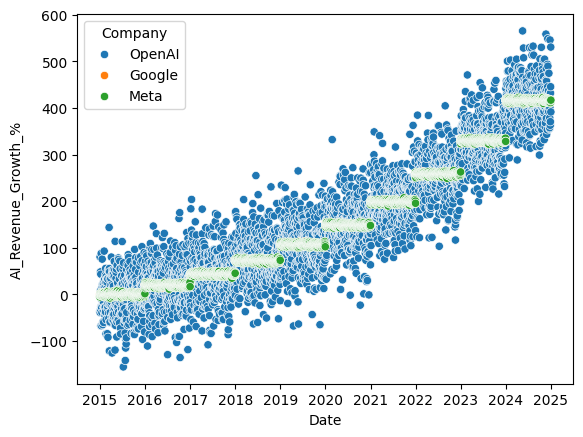

In [29]:
sns.scatterplot(x='Date', y = 'AI_Revenue_Growth_%', data=df, hue='Company')
plt.show()

In [31]:
df.sort_values(by = ['AI_Revenue_Growth_%'])

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
189,2015-07-09,OpenAI,5.66,-0.55,-155.43,NaN,0.70,NaN,NaN,2015
205,2015-07-25,OpenAI,5.23,-0.42,-141.61,NaN,-0.62,NaN,NaN,2015
649,2016-10-11,OpenAI,5.37,-0.35,-135.31,NaN,0.12,NaN,NaN,2016
548,2016-07-02,OpenAI,5.19,-0.29,-129.11,NaN,-0.31,NaN,NaN,2016
98,2015-04-09,OpenAI,4.80,-0.25,-125.50,NaN,-0.56,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...
3508,2024-08-09,OpenAI,9.92,6.33,532.86,NaN,0.77,NaN,NaN,2024
3645,2024-12-24,OpenAI,8.79,6.46,546.07,NaN,0.45,NaN,NaN,2024
3627,2024-12-06,OpenAI,8.51,6.49,548.83,NaN,-0.15,NaN,NaN,2024
3612,2024-11-21,OpenAI,10.16,6.59,558.70,NaN,0.63,NaN,NaN,2024


OpenAi Revenue Growth Year-By-Year

In [32]:
df_openAi

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,NaN,NaN,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,NaN,NaN,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,NaN,NaN,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,NaN,NaN,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...
3648,2024-12-27,OpenAI,10.06,4.71,370.69,NaN,0.93,NaN,NaN,2024
3649,2024-12-28,OpenAI,9.67,5.32,432.15,NaN,-0.25,NaN,NaN,2024
3650,2024-12-29,OpenAI,9.17,5.46,445.74,NaN,0.47,NaN,NaN,2024
3651,2024-12-30,OpenAI,10.36,6.31,530.88,NaN,0.69,NaN,NaN,2024


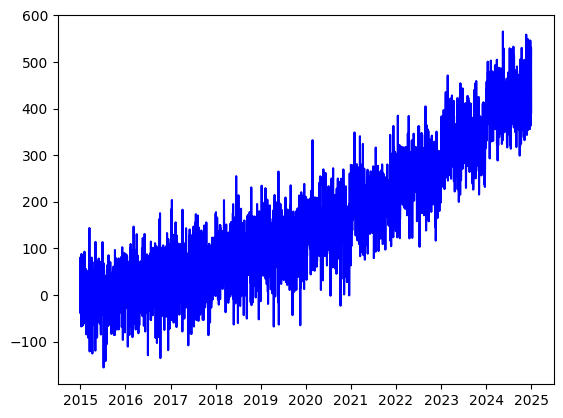

In [33]:
plt.plot(df_openAi['Date'], df_openAi['AI_Revenue_Growth_%'], label='OpenAi', color='blue')
plt.show()

GoogleAi Revenue Growth Year-By-Year

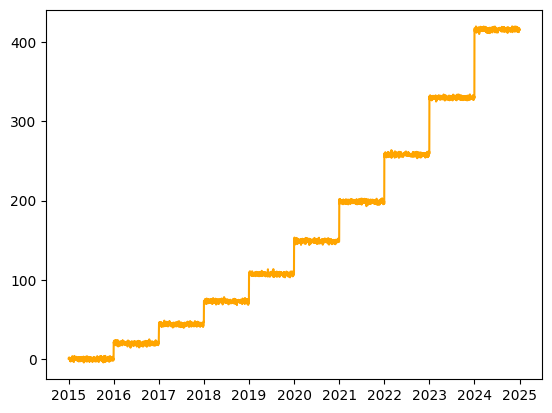

In [34]:
plt.plot(df_google['Date'], df_google['AI_Revenue_Growth_%'], label='Google' , color='orange')

MetaAi Revenue Growth Year-By-Year

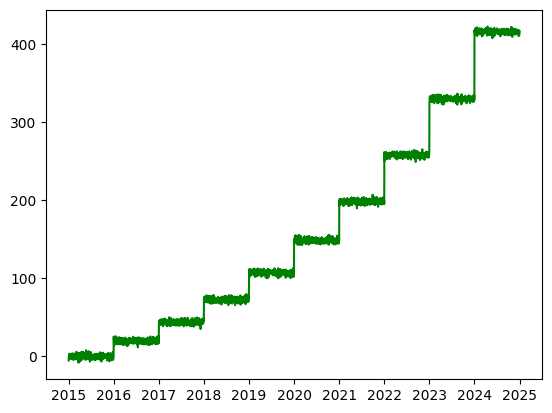

In [35]:
plt.plot(df_meta['Date'], df_meta['AI_Revenue_Growth_%'], label='Meta', color='green')

Corelation between columns

In [40]:
df.corr(numeric_only=True)

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
R&D_Spending_USD_Mn,1.000000,0.935030,0.291245,-0.004628,NaN,-0.997025,0.297701
AI_Revenue_USD_Mn,0.935030,1.000000,0.530128,-0.000017,NaN,-0.987146,0.526478
AI_Revenue_Growth_%,0.291245,0.530128,1.000000,0.020937,NaN,-0.828646,0.952199
Stock_Impact_%,-0.004628,-0.000017,0.020937,1.000000,NaN,-0.999812,0.016525
Unnamed: 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,-0.997025,-0.987146,-0.828646,-0.999812,NaN,1.000000,-0.494744
Year,0.297701,0.526478,0.952199,0.016525,NaN,-0.494744,1.000000


<Axes: >

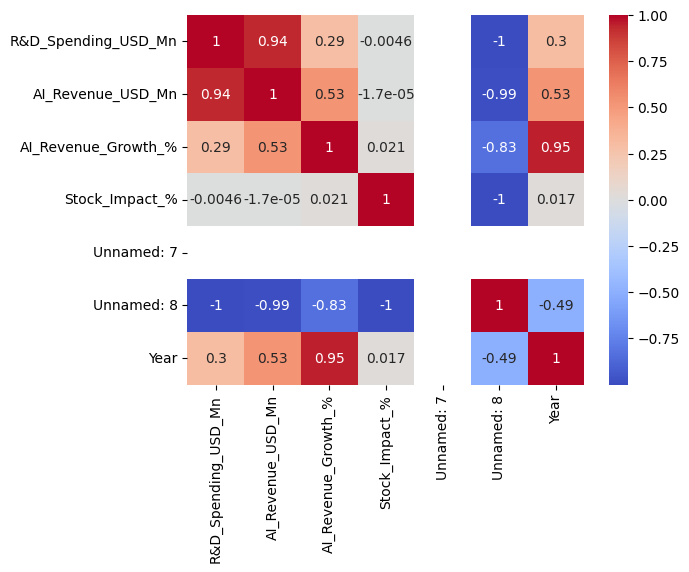

In [39]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

Expenditure VS Revenue year-by-by

In [42]:
spend = df.groupby('Year')['R&D_Spending_USD_Mn'].sum()
spend

Year
2015    49304.23
2016    53349.94
2017    57475.12
2018    62002.16
2019    67071.51
2020    72602.53
2021    78207.32
2022    84390.17
2023    91193.92
2024    98760.08
Name: R&D_Spending_USD_Mn, dtype: float64

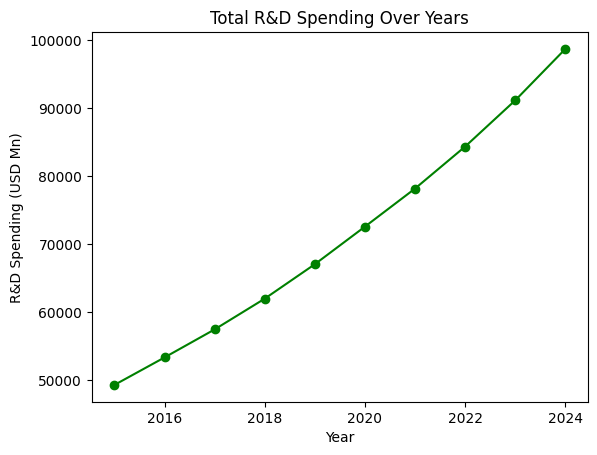

In [45]:
plt.plot(spend.index, spend.values, marker='o', color='green')
plt.title('Total R&D Spending Over Years')
plt.xlabel('Year')
plt.ylabel('R&D Spending (USD Mn)')
plt.show()

In [49]:
revenue= df.groupby('Year')['AI_Revenue_USD_Mn'].sum()
revenue

Year
2015    18623.21
2016    22361.20
2017    26776.80
2018    32164.44
2019    38580.32
2020    46456.19
2021    55591.14
2022    66674.24
2023    80041.64
2024    96313.91
Name: AI_Revenue_USD_Mn, dtype: float64

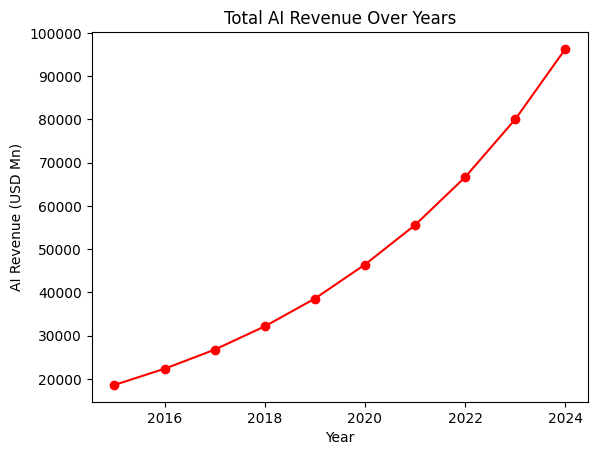

In [52]:
plt.plot(revenue.index, revenue.values, marker='o', color='r')
plt.title('Total AI Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('AI Revenue (USD Mn)')
plt.show()

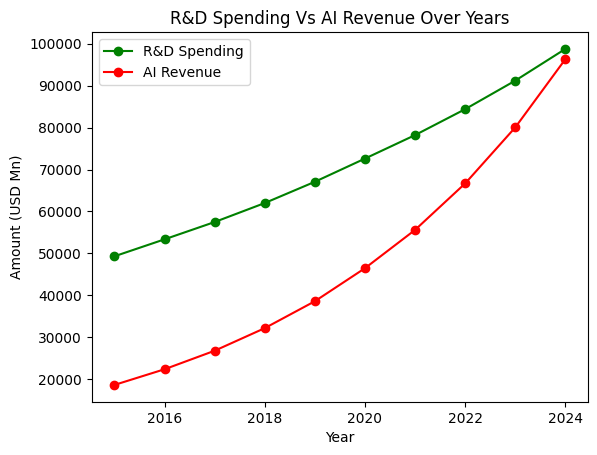

In [54]:
plt.plot(spend.index, spend.values, marker='o', color='green')
plt.plot(revenue.index, revenue.values, marker='o', color='r')
plt.title('R&D Spending Vs AI Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Amount (USD Mn)')
plt.legend(['R&D Spending', 'AI Revenue'])
plt.show()

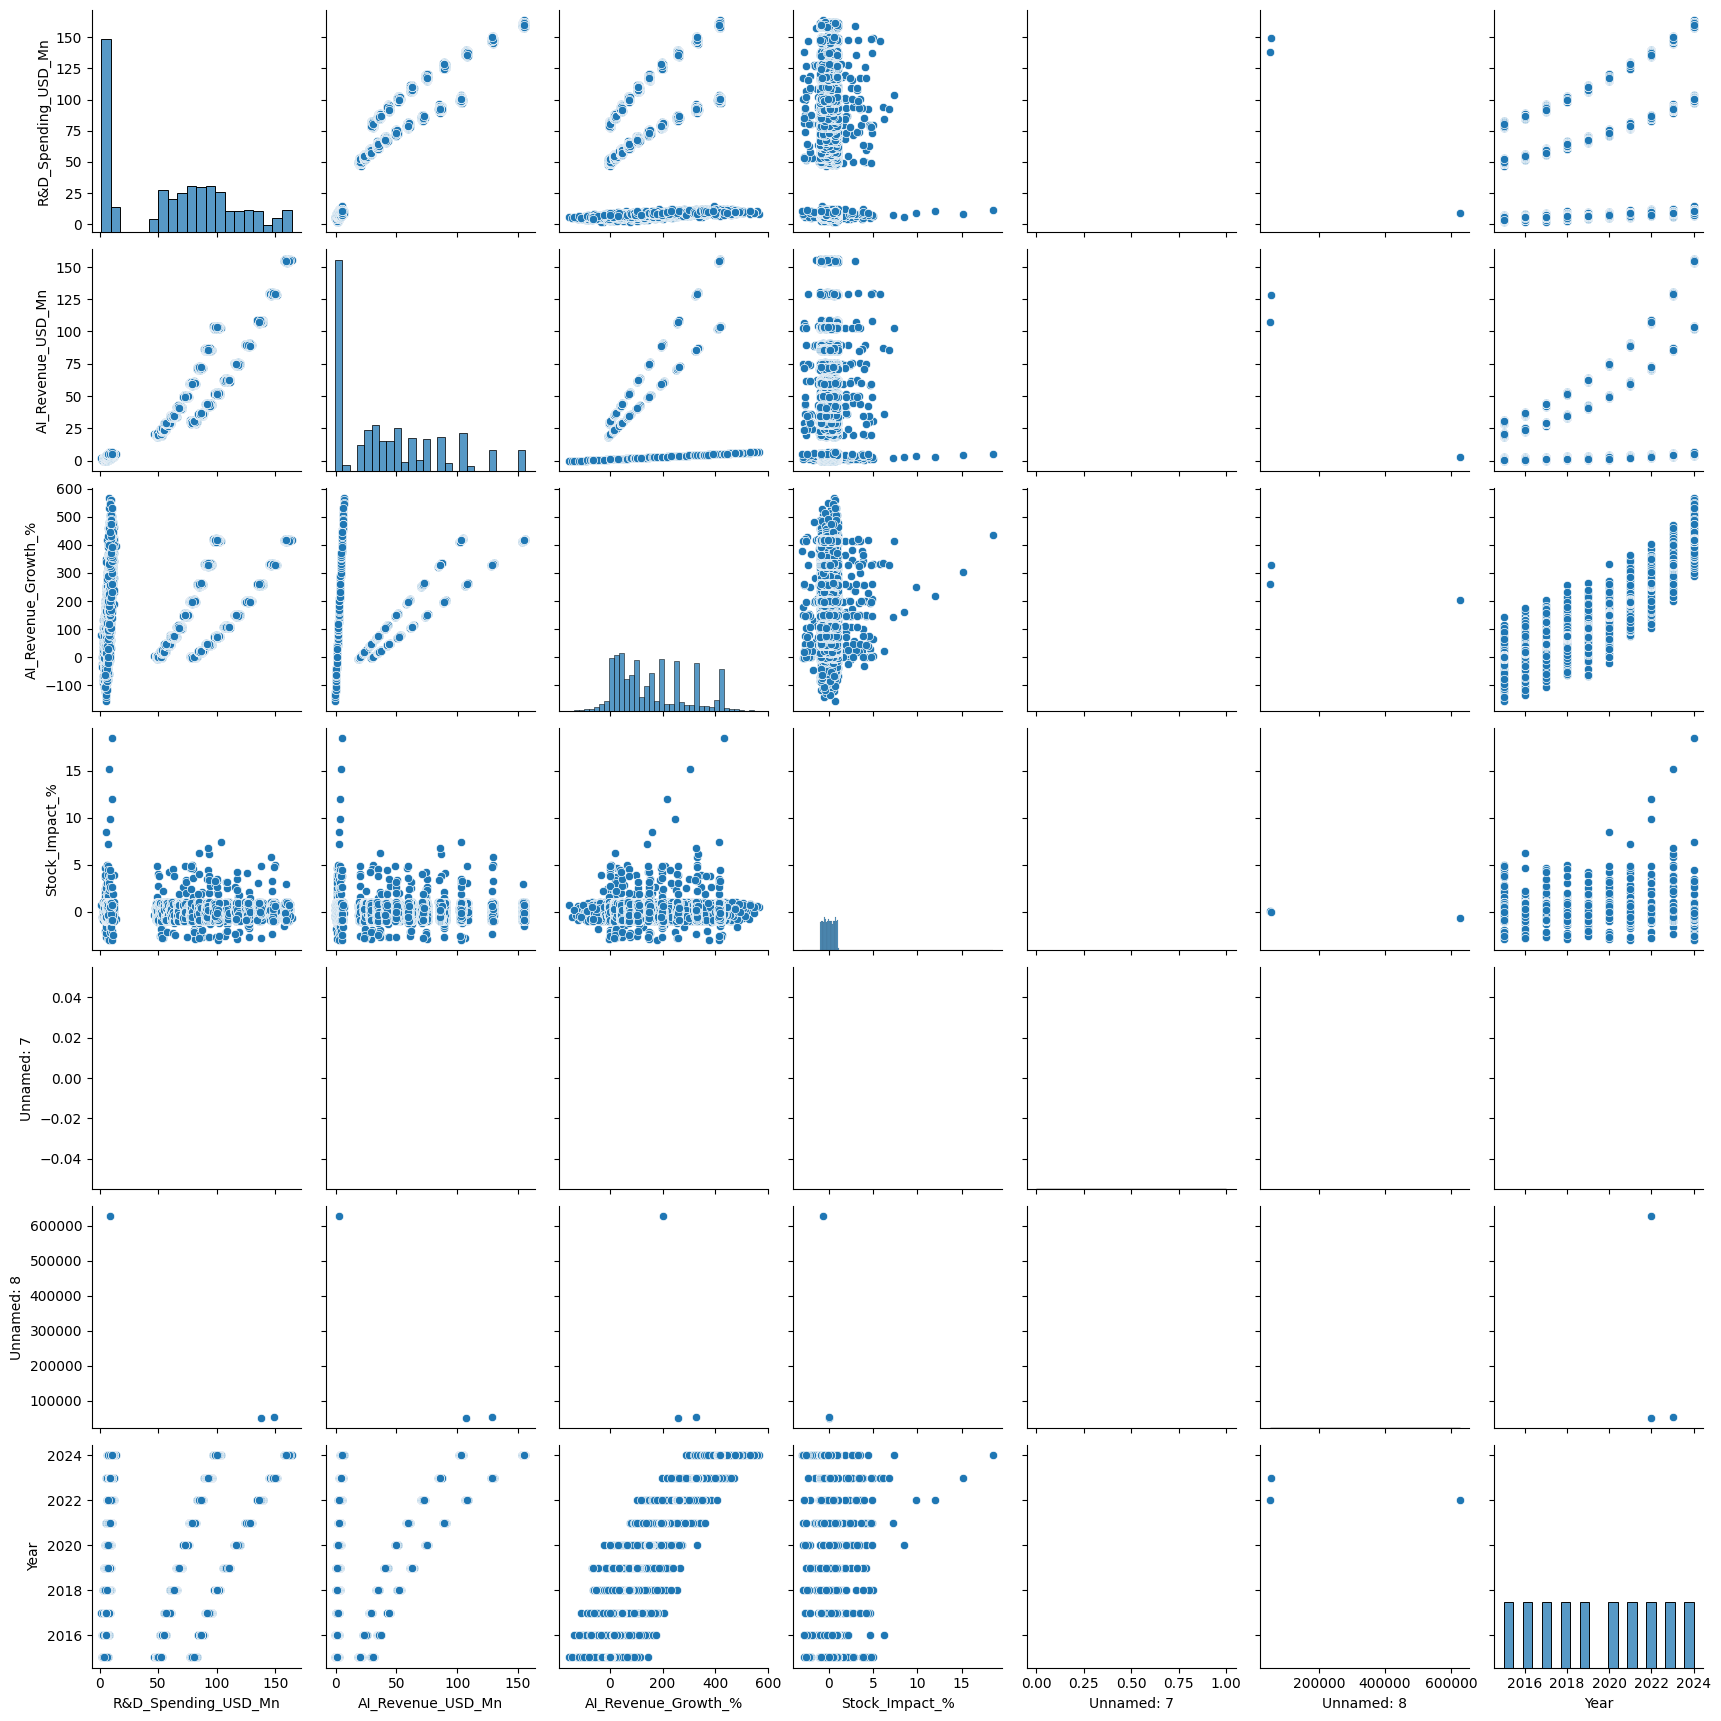

In [55]:
sns.pairplot(df)

In [56]:
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,NaN,NaN,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,NaN,NaN,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,NaN,NaN,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,NaN,NaN,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,NaN,NaN,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,NaN,NaN,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,NaN,NaN,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,NaN,NaN,2024


In [57]:
df.Event.value_counts()

Event
AI speech recognition release      37
AI-powered search update           32
AI Ads Optimization upgrade        32
AI partnership deal                32
AI Video Recommendation upgrade    29
Cloud AI launch                    27
AI ethics policy update            27
TensorFlow open-source release      1
LLaMA 2 release                     1
LLaMA 1 release                     1
Gemini AI release                   1
Bard chatbot launch                 1
MUM Search Model launch             1
BERT for Search launch              1
AlphaGo beats Lee Sedol             1
ChatGPT (GPT-3.5) launch            1
GPT-5 release (predicted)           1
GPT-4 release                       1
DALL·E 2 release                    1
Codex release                       1
GPT-3 release                       1
GPT-2 release                       1
GPT-1 release                       1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

checking for a particular event

In [58]:
df[df.Event=='TensorFlow open-source release']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
3965,2015-11-09,Google,79.62,29.84,-0.53,TensorFlow open-source release,4.5,NaN,NaN,2015


In [65]:
tf = df.loc[3955 : 3975]
tf

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Unnamed: 7,Unnamed: 8,Year
3955,2015-10-30,Google,80.33,29.87,-0.43,NaN,0.43,NaN,NaN,2015
3956,2015-10-31,Google,79.53,30.30,0.99,NaN,-0.84,NaN,NaN,2015
3957,2015-11-01,Google,80.37,29.86,-0.48,NaN,0.57,NaN,NaN,2015
3958,2015-11-02,Google,77.89,29.97,-0.10,NaN,0.76,NaN,NaN,2015
3959,2015-11-03,Google,81.00,29.43,-1.89,NaN,-0.45,NaN,NaN,2015
3960,2015-11-04,Google,80.70,29.71,-0.96,AI speech recognition release,-2.17,NaN,NaN,2015
3961,2015-11-05,Google,78.31,30.25,0.85,NaN,0.31,NaN,NaN,2015
3962,2015-11-06,Google,79.08,29.84,-0.54,NaN,-0.72,NaN,NaN,2015
3963,2015-11-07,Google,79.65,30.34,1.14,NaN,0.58,NaN,NaN,2015
3964,2015-11-08,Google,79.63,29.74,-0.86,NaN,-0.61,NaN,NaN,2015


showing the impact with the linechart

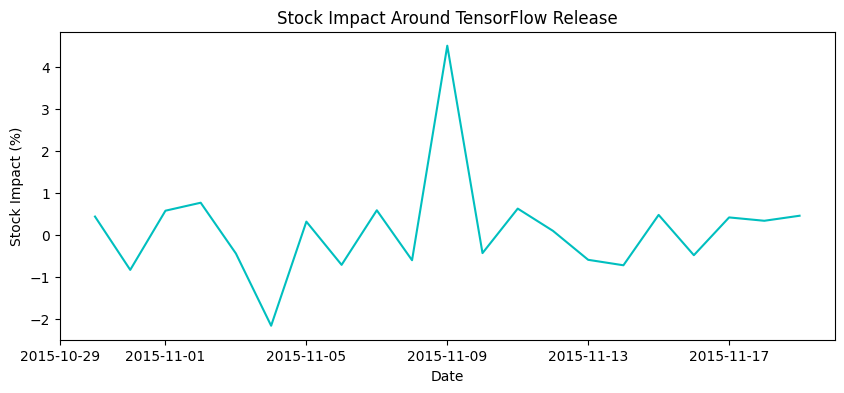

In [68]:
plt.figure(figsize=(10,4))
plt.plot(tf['Date'],tf['Stock_Impact_%'], color='c')
plt.title('Stock Impact Around TensorFlow Release')
plt.xlabel('Date')
plt.ylabel('Stock Impact (%)')
plt.show()

In [71]:
#daily average stock impact by company
Avg = df.groupby('Company')['Stock_Impact_%'].mean()*100
Avg

Company
Google    2.620860
Meta      0.976184
OpenAI    4.070901
Name: Stock_Impact_%, dtype: float64

In [72]:
#daiy average expenditure on R & D by company
Avg_RD = df.groupby('Company')['R&D_Spending_USD_Mn'].mean()
Avg_RD

Company
Google    115.888623
Meta       72.415294
OpenAI      7.249595
Name: R&D_Spending_USD_Mn, dtype: float64

In [73]:
#Maximum impact % on a company stock 
Max_IMP = df.groupby('Company')['Stock_Impact_%'].max()
Max_IMP

Company
Google     6.2
Meta       7.4
OpenAI    18.5
Name: Stock_Impact_%, dtype: float64

In [75]:
#highest change in the index
stocks = df.groupby(['Year', 'Company'])['Stock_Impact_%'].max()
stocks

Year  Company
2015  Google      4.96
      Meta        4.80
      OpenAI      3.92
2016  Google      6.20
      Meta        2.14
      OpenAI      4.66
2017  Google      4.42
      Meta        4.21
      OpenAI      4.63
2018  Google      1.97
      Meta        4.54
      OpenAI      4.94
2019  Google      3.20
      Meta        1.86
      OpenAI      4.20
2020  Google      4.18
      Meta        4.86
      OpenAI      8.50
2021  Google      4.10
      Meta        4.80
      OpenAI      7.20
2022  Google      4.88
      Meta        3.98
      OpenAI     12.00
2023  Google      5.80
      Meta        6.80
      OpenAI     15.20
2024  Google      2.89
      Meta        7.40
      OpenAI     18.50
Name: Stock_Impact_%, dtype: float64

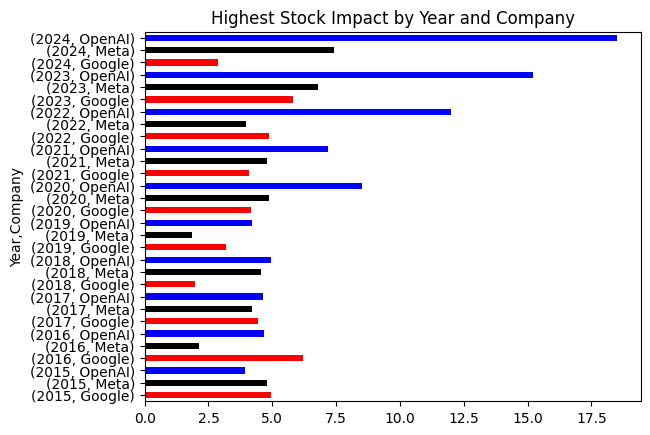

In [77]:
stocks.plot(kind='barh', color=['r', 'black','b'])
plt.title('Highest Stock Impact by Year and Company')
plt.show()